In [1]:
from ContrarianBT import ContrarianBT as BT

In [67]:
tester = BT(symbol="EURUSD=X", start = "2024-06-20",end = "2024-07-26", window=3, leverage=1, quantile=0.6, quantile_window=3, interval="5m" )

[*********************100%%**********************]  1 of 1 completed


## Test methods and instantiation

In [80]:
tester.data.tail()

,Price,returns,lev_returns,window
Datetime,,,,
2024-07-25 23:35:00+01:00,1.084952,-0.000108,-0.000108,1.085046
2024-07-25 23:40:00+01:00,1.085069,0.000108,0.000108,1.085046
2024-07-25 23:45:00+01:00,1.085069,0.000000,0.000000,1.085046
2024-07-25 23:50:00+01:00,1.085069,0.000000,0.000000,1.085046
2024-07-25 23:55:00+01:00,1.085069,0.000000,0.000000,1.085046


In [69]:
tester.backtest()

Strategy Net performance: 0.8515 || Strategy outperformance vs Buy and Hold: -0.1579


In [70]:
tester.result

,Price,returns,lev_returns,window,pc_direction,mag_pricechange,mag_pcquantile,positions,trades,creturns,clev_returns,strategy,strategy_net,cstrategy,cstrategy_net
Datetime,,,,,,,,,,,,,,,
2024-06-20 00:15:00+01:00,1.074922,0.000000,0.000000,1.074922,0.0,0.000000,0.000000,-0.0,0.0,1.000000,1.000000,NaN,NaN,NaN,NaN
2024-06-20 00:20:00+01:00,1.074922,0.000000,0.000000,1.074922,0.0,0.000000,0.000000,-0.0,0.0,1.000000,1.000000,-0.000000,-0.000000,1.000000,1.000000
2024-06-20 00:25:00+01:00,1.075038,0.000107,0.000107,1.074961,1.0,0.000036,0.000021,-1.0,1.0,1.000107,1.000107,-0.000000,-0.000051,1.000000,0.999949
2024-06-20 00:30:00+01:00,1.075038,0.000000,0.000000,1.074999,1.0,0.000036,0.000021,-1.0,0.0,1.000107,1.000107,-0.000000,-0.000000,1.000000,0.999949
2024-06-20 00:35:00+01:00,1.075153,0.000108,0.000108,1.075076,1.0,0.000072,0.000107,-0.0,1.0,1.000215,1.000215,-0.000108,-0.000159,0.999892,0.999790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-25 23:35:00+01:00,1.084952,-0.000108,-0.000108,1.085030,-1.0,0.000036,0.000022,1.0,1.0,1.009331,1.009331,0.000000,-0.000051,1.026785,0.851555
2024-07-25 23:40:00+01:00,1.085069,0.000108,0.000108,1.085030,0.0,0.000072,0.000108,-0.0,1.0,1.009440,1.009440,0.000108,0.000057,1.026896,0.851604
2024-07-25 23:45:00+01:00,1.085069,0.000000,0.000000,1.085030,0.0,0.000072,0.000108,-0.0,0.0,1.009440,1.009440,-0.000000,-0.000000,1.026896,0.851604


In [71]:
tester.result.mag_pricechange.max()

0.002069739910692111

In [72]:
tester.result.mag_pricechange.min()

0.0

In [73]:
tester.result.mag_pricechange.mean() #average magntude

0.0001168851974520814

In [74]:
tester.result.trades.value_counts()

trades
0.0    3976
1.0    3172
2.0     247
Name: count, dtype: int64

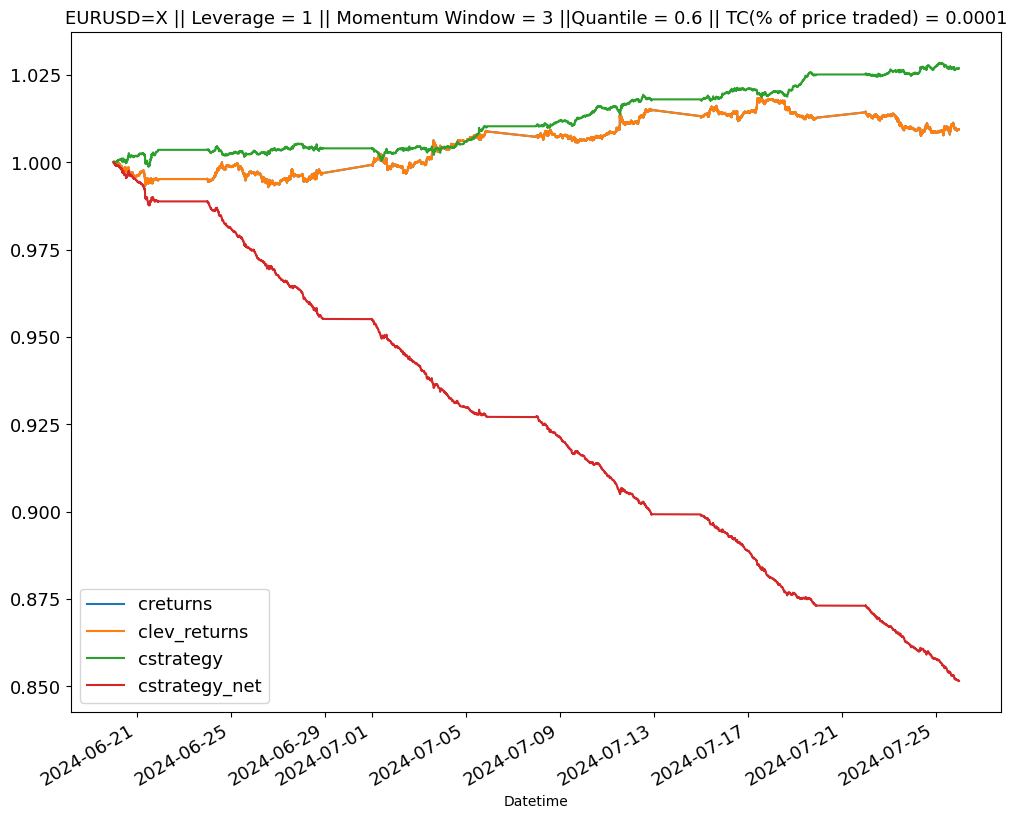

In [75]:
tester.plot_data()

In [77]:
tester.result.trades.value_counts()

trades
0.0    3976
1.0    3172
2.0     247
Name: count, dtype: int64

## Test optimisation

In [78]:
tester.optimise_strategy(window_range=5,quantile_window_range=10,qrange = (0.6,1.0,7,False), leverage_range=(1,1))

350
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Optimal Window : 1 || Quantile Window: 1 ||Quantile : 0.6 || Leverage = 1 || Performance : 1.0


In [61]:
tester.set_parameters(5,9,0.885714,leverage=1)

In [62]:
print(tester)

MomentumBT: EURUSD=X, window = 5,quantile_window =9, quantile = 0.885714, leverage = 1


In [63]:
tester.backtest()

Strategy Net performance: 1.0015 || Strategy outperformance vs Buy and Hold: -0.008


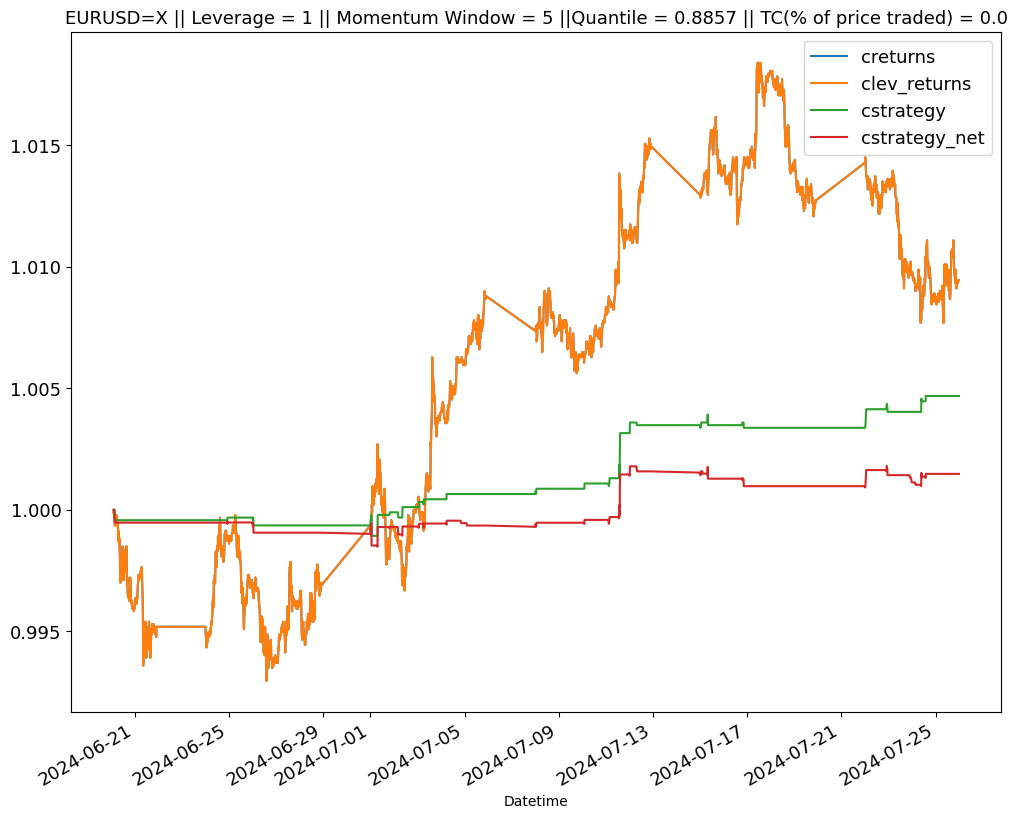

In [64]:
tester.plot_data()

In [65]:
tester.result.trades.value_counts()

trades
0.0    2393
1.0      64
Name: count, dtype: int64

In [79]:
tester.optimisation_results.nlargest(10,columns="performance")

,Window,Quantile_Window,Quantile,Leverage,performance
0,1,1,0.600000,1,1.0
1,1,1,0.657143,1,1.0
2,1,1,0.714286,1,1.0
3,1,1,0.771429,1,1.0
4,1,1,0.828571,1,1.0
5,1,1,0.885714,1,1.0
6,1,1,0.942857,1,1.0
77,2,2,0.600000,1,1.0
78,2,2,0.657143,1,1.0
79,2,2,0.714286,1,1.0


## In & Outsample testing

In [20]:
train = BT("EURUSD=X", start="2017-01-01", end = "2019-12-31", window = 5,quantile_window=5, quantile=0.7, leverage=2)

[*********************100%%**********************]  1 of 1 completed


In [21]:
train

MomentumBT: EURUSD=X, window = 5,quantile_window =5, quantile = 0.7, leverage = 2

In [22]:
train.backtest()

Strategy Net performance: 0.9484 || Strategy outperformance vs Buy and Hold: -0.1059


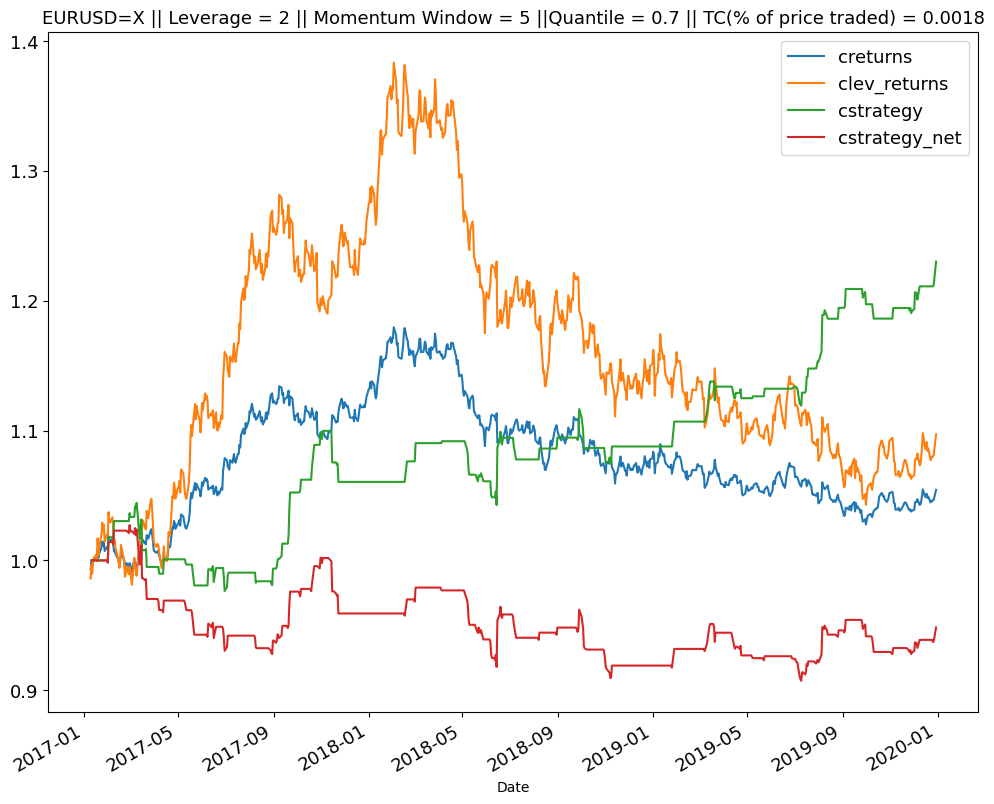

In [23]:
train.plot_data()

In [33]:
test = BT("EURUSD=X", start="2020-01-01", end = "2022-12-31", window = 9, quantile=0.65,leverage=1)

[*********************100%%**********************]  1 of 1 completed


In [34]:
print(test)

MomentumBT: EURUSD=X, window = 9,quantile_window =3, quantile = 0.65, leverage = 1


In [35]:
test.backtest()

Strategy Net performance: 0.5167 || Strategy outperformance vs Buy and Hold: -0.4422


/opt/anaconda3/envs/algotrade/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/opt/anaconda3/envs/algotrade/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/opt/anaconda3/envs/algotrade/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/opt/anaconda3/envs/algotrade/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B'

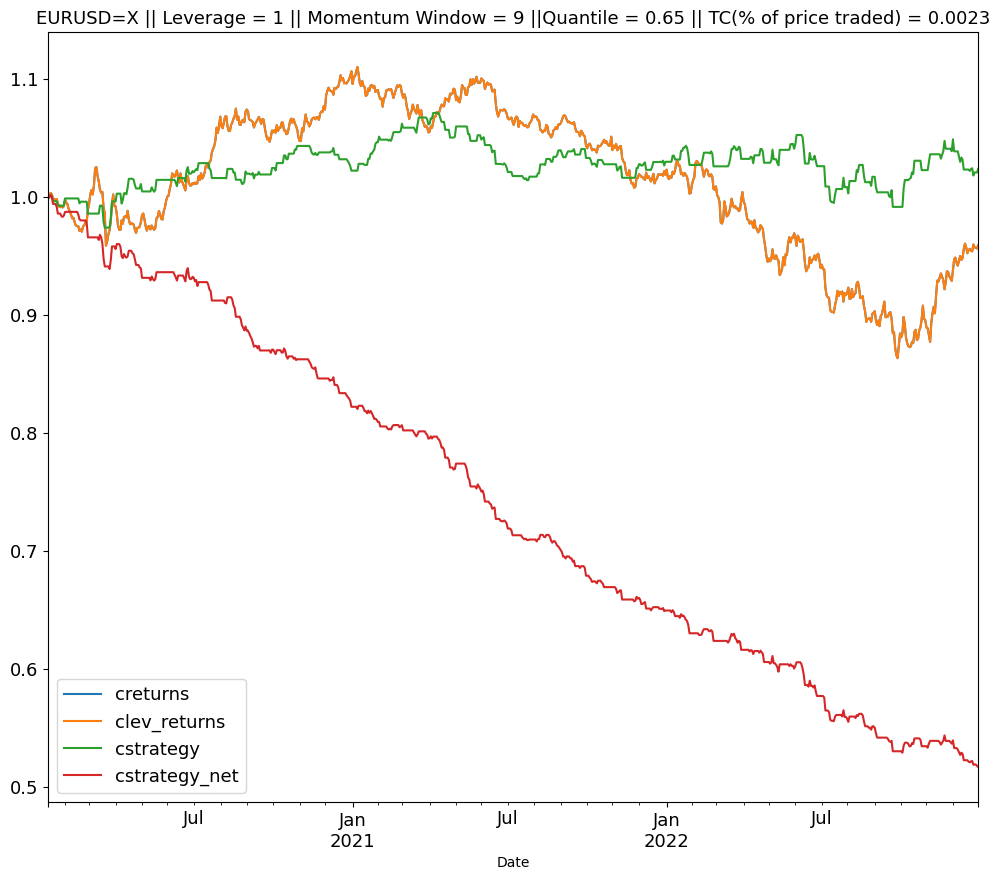

In [36]:
test.plot_data()